In [1]:
# Do necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import holidays, salary_dictionary, train-attendance, train-leaves, train-salary csv files in data folder from pd
holidays = pd.read_csv('../data/holidays.csv')
salary_dictionary = pd.read_csv('../data/salary_dictionary.csv')
train_attendance = pd.read_csv('../data/train-attendance.csv')
train_leaves = pd.read_csv('../data/train-leaves.csv')
train_salary = pd.read_csv('../data/train-salary.csv')

cleaned_emp = pd.read_csv('../employee_preprocess_200304N.csv')
report_salary = pd.read_csv('../testing/report_salary_df.csv')

resigned_employees = pd.read_csv('resigned_employees.csv')

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\1858580289.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_attendance = pd.read_csv('../data/train-attendance.csv')


In [3]:
resigned_employees

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Gender_Marital_Status
0,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,Male-Married
1,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,Female-Married
2,353,155,Zena Nicolas,Mr,Male,1,Married,22,2003-09-29,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962,Male-Married
3,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,2006-07-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967,Male-Married
4,360,573,Angeline Yundt,Mr,Male,1,Married,42,2006-08-29,5/5/2021,Inactive,5/5/2021,\N,\N,Management,Permanant,Buddhist,Transport Officer,1976,Male-Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,2022-04-26,5/4/2022,Inactive,5/4/2022,\N,\N,Labour,Contarct Basis,Buddhist,Helper,1986,Male-Married
760,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,2022-04-28,8/27/2022,Inactive,8/26/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987,Male-Married
761,2604,5418,Price Zieme,Mr,Male,1,Married,78,2022-05-03,9/19/2022,Inactive,9/19/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989,Male-Married
762,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,Inactive,11/4/2022,\N,\N,Management,Contarct Basis,Buddhist,Accountant,1965,Male-Married


In [4]:
# convert Date_Joined to datetime
resigned_employees['Date_Joined'] = pd.to_datetime(resigned_employees['Date_Joined'])


In [9]:
resigned_employees = resigned_employees[resigned_employees['Date_Resigned'] != '\\N']
resigned_employees = resigned_employees[ resigned_employees['Date_Resigned'] != '0000-00-00']

# convert Date_Resigned to datetime
resigned_employees['Date_Resigned'] = pd.to_datetime(resigned_employees['Date_Resigned'])

In [10]:
# create new columns resigned_year and resigned_month
resigned_employees['resigned_year'] = resigned_employees['Date_Resigned'].dt.year
resigned_employees['resigned_month'] = resigned_employees['Date_Resigned'].dt.month


In [11]:
# create a new column year-month
resigned_employees['year-month'] = resigned_employees['resigned_year'].astype(str) + '-' + resigned_employees['resigned_month'].astype(str)

In [12]:
# create a df with year-month and count of employees resigned
resigned_employees_count = resigned_employees.groupby('year-month').count()['Employee_No'].reset_index()
resigned_employees_count.columns = ['year-month', 'count']
resigned_employees_count

,year-month,count
0,2020-10,1
1,2020-11,11
2,2020-12,17
3,2021-1,10
4,2021-10,32
5,2021-11,12
6,2021-12,28
7,2021-2,10
8,2021-3,17
9,2021-4,16


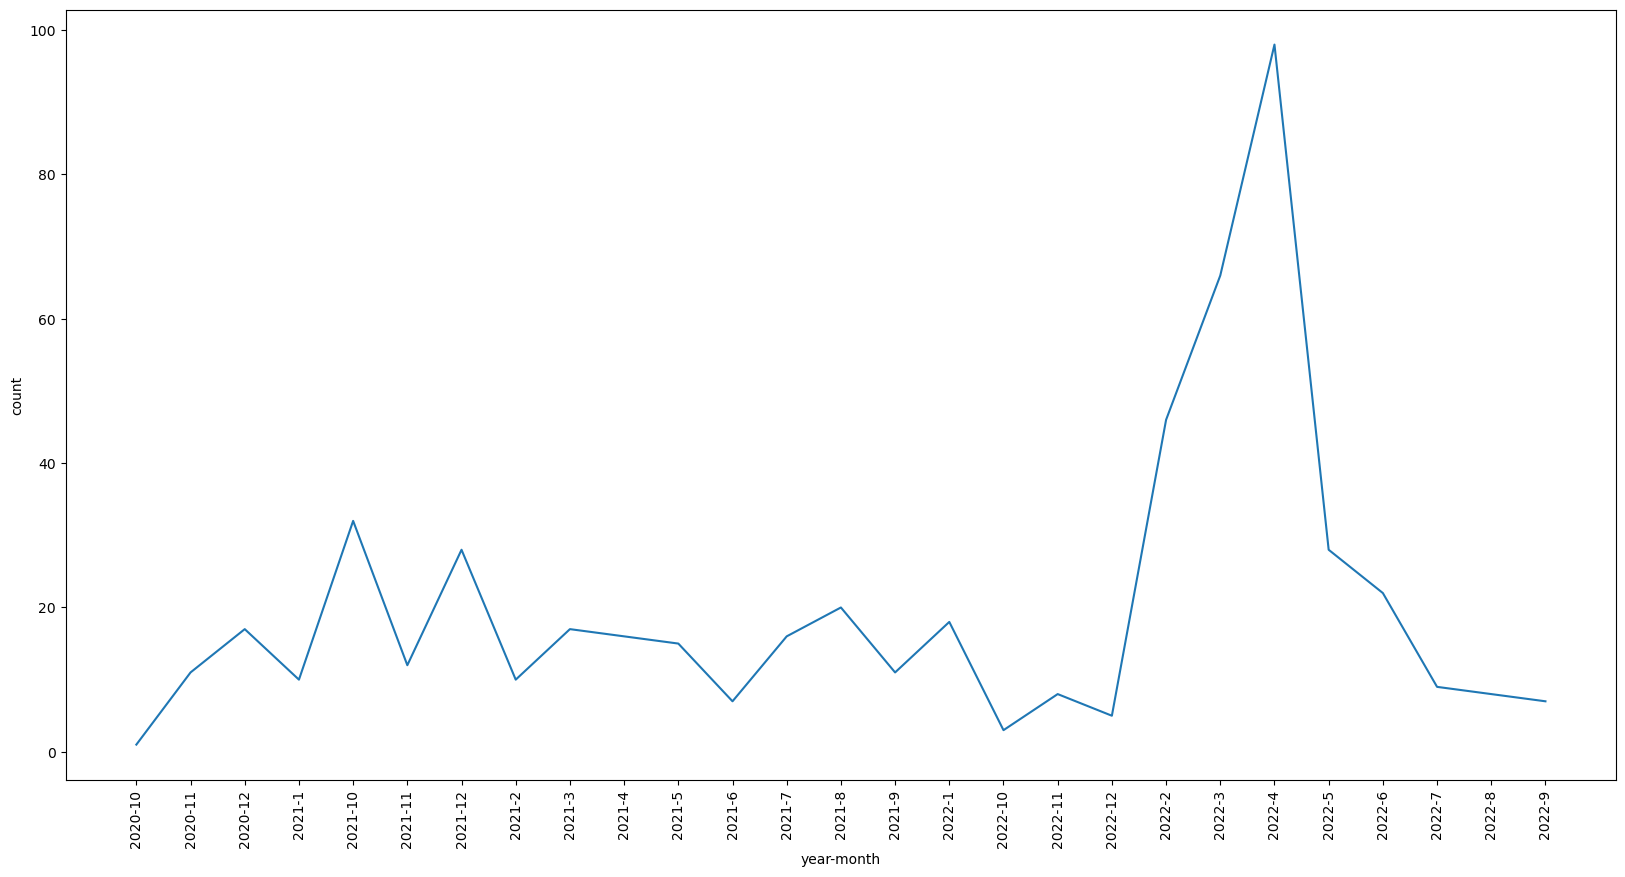

In [13]:
# create a line plot of year-month and count of employees resigned
plt.figure(figsize=(20,10))
sns.lineplot(x='year-month', y='count', data=resigned_employees_count)
plt.xticks(rotation=90)
plt.show()


In [14]:
# export the df to csv
resigned_employees_count.to_csv('resigned_employees_count.csv', index=False)

In [15]:
train_leaves

,Employee_No,leave_date,Type,Applied Date,Remarks,apply_type
0,347,1/29/2020,Half Day,1/4/2022 15:33,\N,Anual
1,347,1/29/2020,Half Day,1/4/2022 15:33,\N,Anual
2,347,1/29/2020,Half Day,1/4/2022 15:36,\N,Anual
3,347,1/29/2020,Half Day,1/4/2022 15:36,\N,Anual
4,347,1/29/2020,Half Day,1/4/2022 18:02,\N,Anual
...,...,...,...,...,...,...
1013,596,1/27/2023,Full Day,1/31/2023 0:00,Personal,Casual
1014,596,1/28/2023,Half Day,1/31/2023 0:00,Personal,Casual
1015,2972,1/28/2023,Half Day,2/3/2023 14:00,Personal,Casual
1016,2972,1/30/2023,Full Day,2/3/2023 14:00,Personal,Casual


In [17]:
# get the details for only resigned employees
train_leaves_resigned = train_leaves[train_leaves['Employee_No'].isin(resigned_employees['Employee_No'])]
train_leaves_resigned

,Employee_No,leave_date,Type,Applied Date,Remarks,apply_type
7,2346,1/10/2022,Full Day,2/15/2022 9:46,Personal,Anual
8,2346,1/11/2022,Full Day,2/15/2022 9:46,Personal,Anual
9,2346,1/12/2022,Full Day,2/15/2022 9:46,Personal,Anual
10,2346,1/13/2022,Full Day,2/15/2022 9:46,Personal,Anual
14,1385,7/15/2021,Half Day,3/7/2022 18:58,For Covid Vaccination.,Anual
...,...,...,...,...,...,...
904,421,8/25/2022,Full Day,8/31/2022 8:56,NaN,Casual
905,425,8/23/2022,Full Day,8/31/2022 8:56,NaN,Casual
922,2642,9/24/2022,Half Day,9/26/2022 14:30,Personnel,Casual
929,550,9/2/2022,Full Day,10/5/2022 9:45,NaN,Casual


In [22]:
# group bu apply_type
apply_type = train_leaves_resigned.groupby('apply_type').count()['Employee_No'].reset_index()

apply_type

,apply_type,Employee_No
0,Anual,101
1,Casual,126


In [23]:
# get the details for only active employees
train_leaves_active = train_leaves[~train_leaves['Employee_No'].isin(resigned_employees['Employee_No'])]
train_leaves_active

,Employee_No,leave_date,Type,Applied Date,Remarks,apply_type
0,347,1/29/2020,Half Day,1/4/2022 15:33,\N,Anual
1,347,1/29/2020,Half Day,1/4/2022 15:33,\N,Anual
2,347,1/29/2020,Half Day,1/4/2022 15:36,\N,Anual
3,347,1/29/2020,Half Day,1/4/2022 15:36,\N,Anual
4,347,1/29/2020,Half Day,1/4/2022 18:02,\N,Anual
...,...,...,...,...,...,...
1013,596,1/27/2023,Full Day,1/31/2023 0:00,Personal,Casual
1014,596,1/28/2023,Half Day,1/31/2023 0:00,Personal,Casual
1015,2972,1/28/2023,Half Day,2/3/2023 14:00,Personal,Casual
1016,2972,1/30/2023,Full Day,2/3/2023 14:00,Personal,Casual


In [24]:
actapply_type = train_leaves_active.groupby('apply_type').count()['Employee_No'].reset_index()

actapply_type

,apply_type,Employee_No
0,Anual,365
1,Casual,426


In [31]:
# get number of instances where Remarks includes 'Covid', 'covid', 'COVID', 'sick', 'Sick', 'SICK', 'well', 'Well', 'WELL', 'vaccine', 'Vaccine', 'VACCINE'
train_leaves_resigned['Remarks'].str.contains('Covid|covid|COVID|sick|Sick|SICK|well|Well|WELL|Vaccine|vaccine|VACCINE|').sum()

169

In [32]:
train_leaves['Remarks'].str.contains('Covid|covid|COVID|sick|Sick|SICK|well|Well|WELL|Vaccine|vaccine|VACCINE|').sum()


773

In [33]:
type_res = train_leaves_resigned.groupby('Type').count()['Employee_No'].reset_index()
type_res

,Type,Employee_No
0,Full Day,148
1,Half Day,79


In [34]:
train_leaves_active.groupby('Type').count()['Employee_No'].reset_index()

,Type,Employee_No
0,Full Day,494
1,Half Day,297


In [35]:
data_resigned = cleaned_emp[cleaned_emp['Employee_No'].isin(resigned_employees['Employee_No'])]
data_resigned

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,2006-07-01,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967
10,360,573,Angeline Yundt,Mr,Male,1,Married,42,2006-08-29,5/5/2021,Inactive,5/5/2021,\N,\N,Management,Permanant,Buddhist,Transport Officer,1976
12,363,691,Leonel Romaguera,Mr,Male,1,Married,24,2007-05-25,5/23/2021,Inactive,5/23/2021,\N,\N,Staff,Permanant,Buddhist,Driver,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,2022-04-26,5/4/2022,Inactive,5/4/2022,\N,\N,Labour,Contarct Basis,Buddhist,Helper,1986
971,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,2022-04-28,8/27/2022,Inactive,8/26/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987
974,2604,5418,Price Zieme,Mr,Male,1,Married,78,2022-05-03,9/19/2022,Inactive,9/19/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989
982,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,Inactive,11/4/2022,\N,\N,Management,Contarct Basis,Buddhist,Accountant,1965


In [37]:
# convert Date_Joined to datetime
data_resigned['Date_Joined'] = pd.to_datetime(data_resigned['Date_Joined'])

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\1841931451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resigned['Date_Joined'] = pd.to_datetime(data_resigned['Date_Joined'])


In [39]:
# calculate age of resigned employees
data_resigned['joined_age'] = data_resigned['Date_Joined'].dt.year - data_resigned['Year_of_Birth']

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\162345640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resigned['joined_age'] = data_resigned['Date_Joined'].dt.year - data_resigned['Year_of_Birth']


In [40]:
# convert date_resigned to datetime
data_resigned['Date_Resigned'] = pd.to_datetime(data_resigned['Date_Resigned'])

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\874996802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resigned['Date_Resigned'] = pd.to_datetime(data_resigned['Date_Resigned'])


In [41]:
# calculate age of resigned employees
data_resigned['resigned_age'] = data_resigned['Date_Resigned'].dt.year - data_resigned['Year_of_Birth']

data_resigned

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\1944878190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resigned['resigned_age'] = data_resigned['Date_Resigned'].dt.year - data_resigned['Year_of_Birth']


,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,joined_age,resigned_age
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,2021-06-28,...,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,14,47
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,2022-01-31,...,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,25,48
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,2006-07-01,2022-01-31,...,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967,39,55
10,360,573,Angeline Yundt,Mr,Male,1,Married,42,2006-08-29,2021-05-05,...,5/5/2021,\N,\N,Management,Permanant,Buddhist,Transport Officer,1976,30,45
12,363,691,Leonel Romaguera,Mr,Male,1,Married,24,2007-05-25,2021-05-23,...,5/23/2021,\N,\N,Staff,Permanant,Buddhist,Driver,1975,32,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,2022-04-26,2022-05-04,...,5/4/2022,\N,\N,Labour,Contarct Basis,Buddhist,Helper,1986,36,36
971,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,2022-04-28,2022-08-27,...,8/26/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987,35,35
974,2604,5418,Price Zieme,Mr,Male,1,Married,78,2022-05-03,2022-09-19,...,9/19/2022,\N,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989,33,33
982,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,2022-11-04,...,11/4/2022,\N,\N,Management,Contarct Basis,Buddhist,Accountant,1965,57,57


In [42]:
# calculate service period of resigned employees
data_resigned['service_period'] = data_resigned['Date_Resigned'].dt.year - data_resigned['Date_Joined'].dt.year
data_resigned 

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\1004655371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resigned['service_period'] = data_resigned['Date_Resigned'].dt.year - data_resigned['Date_Joined'].dt.year


,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,joined_age,resigned_age,service_period
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,2021-06-28,...,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974,14,47,33
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,2022-01-31,...,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,25,48,23
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,2006-07-01,2022-01-31,...,\N,\N,Staff,Permanant,Buddhist,Electrician,1967,39,55,16
10,360,573,Angeline Yundt,Mr,Male,1,Married,42,2006-08-29,2021-05-05,...,\N,\N,Management,Permanant,Buddhist,Transport Officer,1976,30,45,15
12,363,691,Leonel Romaguera,Mr,Male,1,Married,24,2007-05-25,2021-05-23,...,\N,\N,Staff,Permanant,Buddhist,Driver,1975,32,46,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,2022-04-26,2022-05-04,...,\N,\N,Labour,Contarct Basis,Buddhist,Helper,1986,36,36,0
971,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,2022-04-28,2022-08-27,...,\N,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987,35,35,0
974,2604,5418,Price Zieme,Mr,Male,1,Married,78,2022-05-03,2022-09-19,...,\N,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989,33,33,0
982,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,2022-11-04,...,\N,\N,Management,Contarct Basis,Buddhist,Accountant,1965,57,57,0


In [53]:
data_active = cleaned_emp[~cleaned_emp['Employee_No'].isin(resigned_employees['Employee_No'])]
data_active

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
5,353,155,Zena Nicolas,Mr,Male,1,Married,22,2003-09-29,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,2003-11-10,0000-00-00,Active,0000-00-00,945,\N,Staff,Permanant,Buddhist,Technical Officer,1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2831,5433,Ms Katelin Medhurst,Mr,Male,1,Single,111,2022-10-25,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Management Trainee,1996
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [54]:
# convert Date_Joined to datetime
data_active['Date_Joined'] = pd.to_datetime(data_active['Date_Joined'])

# data_active = data_active[data_active['Date_Resigned'] != '\\N']
# data_active = data_active[ data_active['Date_Resigned'] != '0000-00-00']

# convert date_resigned to datetime
# data_active['Date_Resigned'] = pd.to_datetime(data_active['Date_Resigned'])

data_active


C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\3274421153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_active['Date_Joined'] = pd.to_datetime(data_active['Date_Joined'])


,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,1993-12-08,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,1995-03-14,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,2001-01-26,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
5,353,155,Zena Nicolas,Mr,Male,1,Married,22,2003-09-29,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,2003-11-10,0000-00-00,Active,0000-00-00,945,\N,Staff,Permanant,Buddhist,Technical Officer,1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2831,5433,Ms Katelin Medhurst,Mr,Male,1,Single,111,2022-10-25,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Management Trainee,1996
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,2022-11-21,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,2022-12-05,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,2022-12-08,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [55]:
# calculate age of active employees
data_active['joined_age'] = data_active['Date_Joined'].dt.year - data_active['Year_of_Birth']



# calculate service period of active employees use today date as date_resigned
data_active['service_period'] = 2023 - data_active['Date_Joined'].dt.year

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\16959420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_active['joined_age'] = data_active['Date_Joined'].dt.year - data_active['Year_of_Birth']
C:\Users\Malshan\AppData\Local\Temp\ipykernel_14216\16959420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_active['service_period'] = 2023 - data_active['Date_Joined'].dt.year


In [71]:
data_active.columns

Index(['Employee_No', 'Employee_Code', 'Name', 'Title', 'Gender',
       'Religion_ID', 'Marital_Status', 'Designation_ID', 'Date_Joined',
       'Date_Resigned', 'Status', 'Inactive_Date', 'Reporting_emp_1',
       'Reporting_emp_2', 'Employment_Category', 'Employment_Type', 'Religion',
       'Designation', 'Year_of_Birth', 'joined_age', 'service_period'],
      dtype='object')

In [ ]:
# create a df only including Employee_No,Employment_Category, Gender,service_period



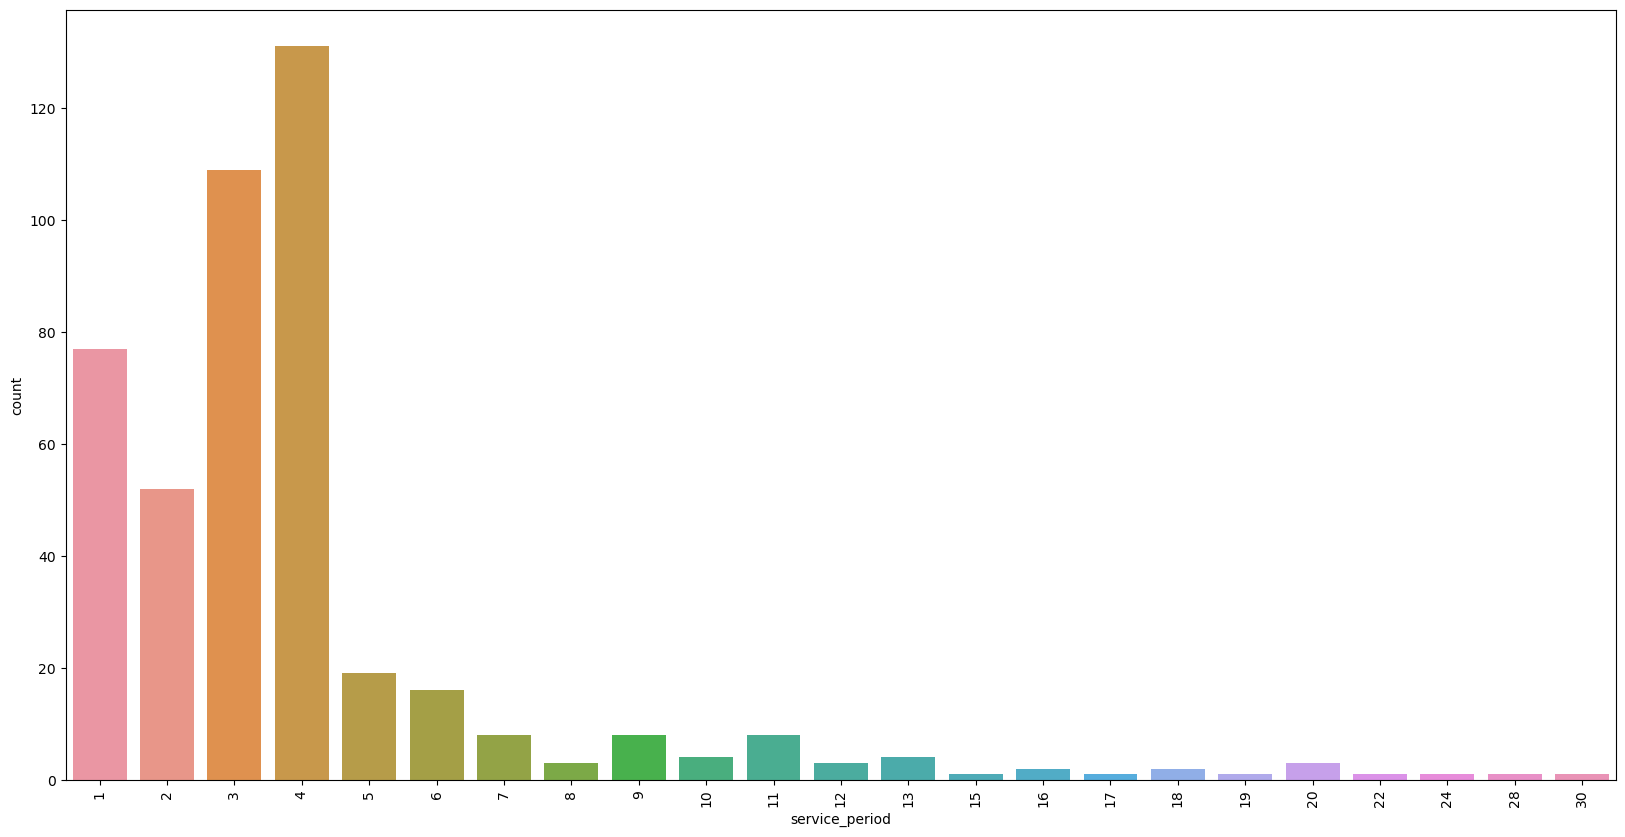

In [70]:
# get the count for resigned employees whose service period is less than 1 year and more than 1 year into a df
service_period_active = data_active.groupby('service_period').count()['Employee_No'].reset_index()
service_period_active.columns = ['service_period', 'count']

# plot a histogram of service period for resigned employees
plt.figure(figsize=(20,10))
sns.barplot(x='service_period', y='count', data=service_period_active, )
plt.xticks(rotation=90)
plt.show()


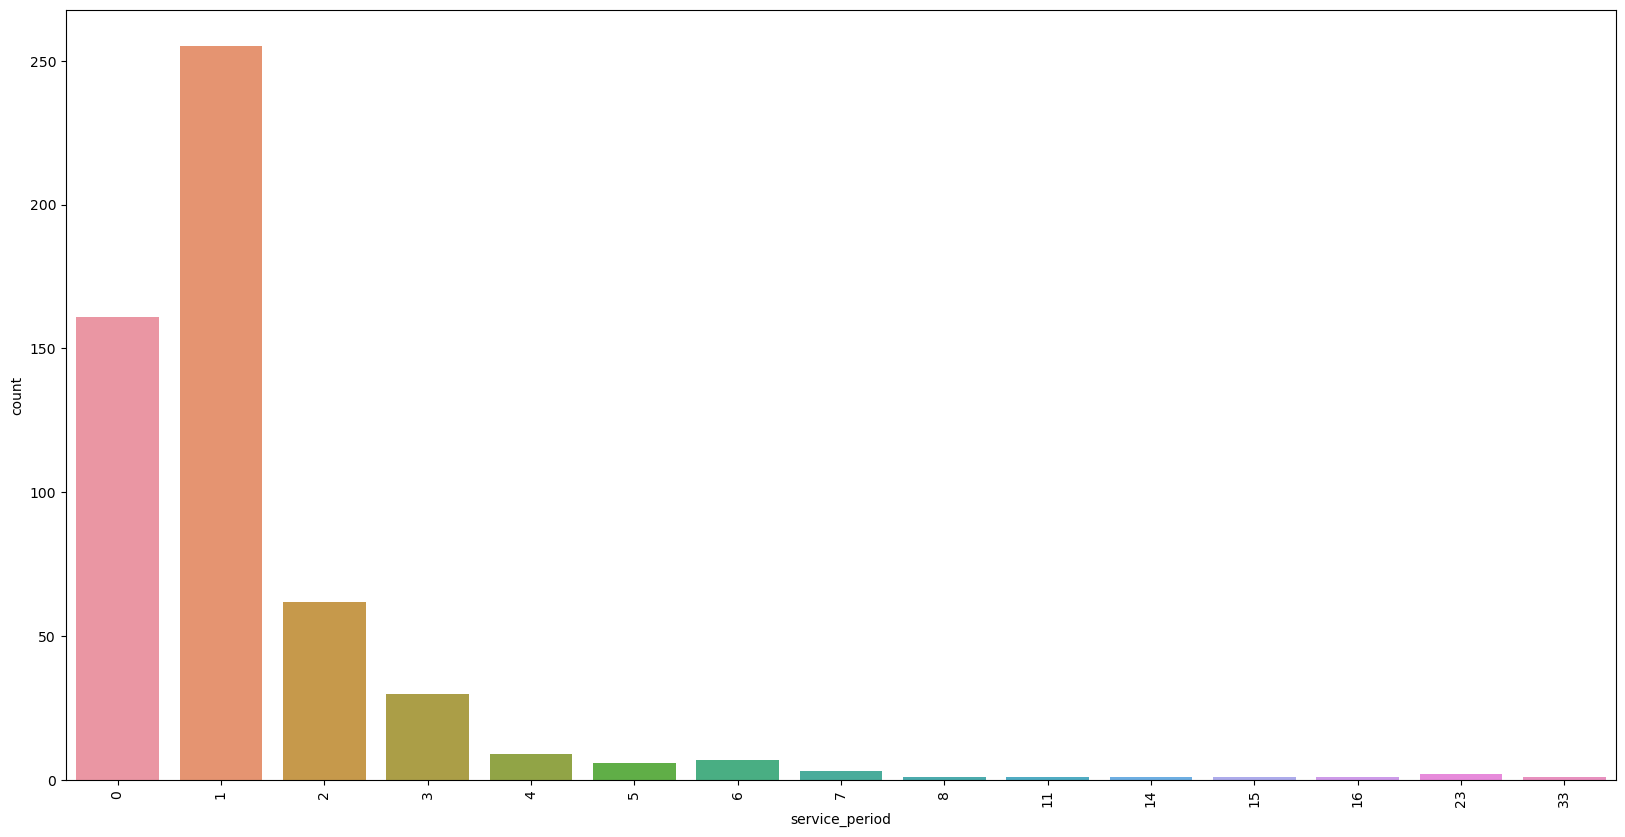

In [67]:
# get the count for resigned employees whose service period is less than 1 year and more than 1 year into a df
service_period_resigned = data_resigned.groupby('service_period').count()['Employee_No'].reset_index()
service_period_resigned.columns = ['service_period', 'count']

# plot a histogram of service period for resigned employees
plt.figure(figsize=(20,10))
sns.barplot(x='service_period', y='count', data=service_period_resigned, )
plt.xticks(rotation=90)
plt.show()





In [61]:
# get the details for active employees whose service period is less than 1 year
data_active[data_active['service_period'] < 1]

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,joined_age,service_period


In [68]:
service_period_resigned.to_csv('service_period_resigned.csv', index=False)

In [69]:
service_period_resigned

,service_period,count
0,0,161
1,1,255
2,2,62
3,3,30
4,4,9
5,5,6
6,6,7
7,7,3
8,8,1
9,11,1


In [72]:
#export the df to csv
data_resigned.to_csv('data_resigned.csv', index=False)

In [ ]:
data_active.to_csv('data_active.csv', index=False)